# "Our slice of paradise"
> "where we are free to roam and explore"

- toc: true
- badges: false
- hide_github_badge: true
- hide_colab_badge: true
- hide_binder_badge: true
- image: images/copied_from_nb/2021-05-01-our-slice-of-paradise.png
- comments: false
- categories: [matplotlib, cartopy]

![our slice of paradise](2021-05-01-our-slice-of-paradise.png)

## quick showcase of cartopy

I had some requirements lately do plot geo data at work. As I didn't want to add too many things to my stack, I looked around for a way to quickly integrate some map-ing into matplotlib. Turns out there's several toolkits to add this functionality, but I checked out cartopy, as it seemed the most _official_ and not too dificult to get started.

[cartopy](https://scitools.org.uk/cartopy/docs/latest/) is the [official successor](https://matplotlib.org/basemap/users/intro.html#deprecation-notice) of [basemap](https://matplotlib.org/basemap/index.html)

Installation on Windows is a bit tricky due to the non-python dependencies. Easiest way to install is with the [wheels](https://realpython.com/python-wheels/) from <https://www.lfd.uci.edu/~gohlke/pythonlibs/#cartopy>

SciPy is also required, but can be installed using `pip install scipy`.

What I enjoyed the most in my quick dive is once cartopy is good to go you can just add and draw to the maps with regular matplotlib syntax - check out the small example below on how to mix a map with some _regular_ line plots - used to highlight certain timezones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

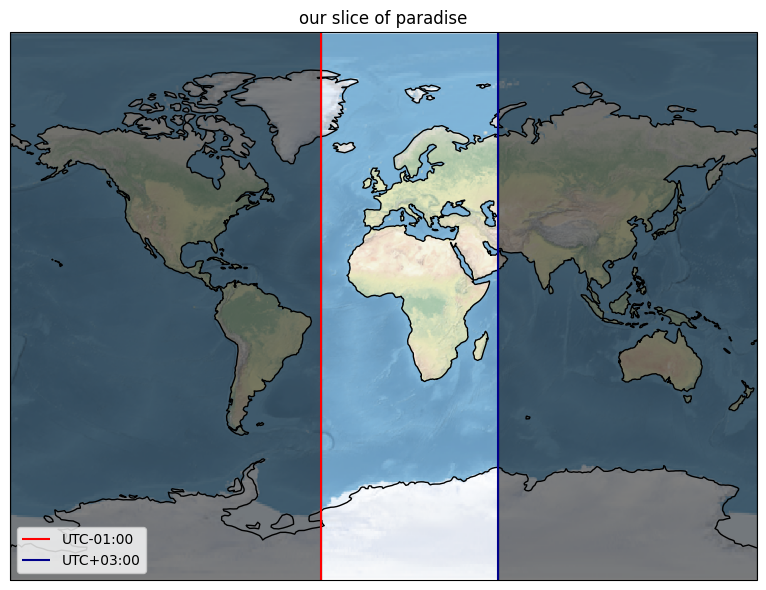

In [17]:
#collapse-output
fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=ccrs.Miller())
ax.stock_img()
ax.coastlines()

tz0 = -30
tz1 = 55

ax.fill_betweenx([-180, 180], -180, tz0, alpha=.5, color="black")
ax.fill_betweenx([-180, 180], tz1, 180, alpha=.5, color="black" )

ax.vlines(tz0, -180, 180, colors="red", label="UTC-01:00" )
ax.vlines(tz1, -180, 180, colors="blue", label="UTC+03:00" )

ax.set_title("our slice of paradise")
ax.legend(loc="lower left")

fig.add_subplot(ax)
plt.style.use("default")
fig.tight_layout()

![our slice of paradise](2021-05-01-our-slice-of-paradise.png)

In [19]:
#hide
plt.savefig("2021-05-01-our-slice-of-paradise.png")

<Figure size 640x480 with 0 Axes>

## update: quick alternative with pure geopandas

<Figure size 1080x720 with 0 Axes>

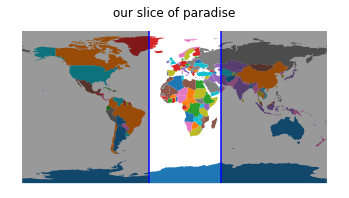

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig = plt.figure(figsize=(15, 10))
plt.style.use("tableau-colorblind10")
plt.tight_layout()
ax = df.plot(column="name")

ax.fill_betweenx([-90, 90], -180, -30, facecolor="black", alpha=0.4)
ax.fill_betweenx([-90, 90], 55, 180, facecolor="black", alpha=0.4)

ax.vlines(-30, -90, 90, colors="blue")
ax.vlines(55, -90, 90, colors="blue")
ax.set_title("our slice of paradise")
ax.set_axis_off()
